# This exploratory data analysis is based on the products data provided by Amazon.

In [61]:
#importing the libraries that will be used in this project
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from termcolor import colored

In [62]:
#reading the data into a dataframe
df = pd.read_csv("../sample.csv")
#Intial shape of the dataframe
print("Initial shape of the dataframe is : ", df.shape , "\n")
#Printing the first 2 rows of the datframe
print("The first 2 rows of the dataframe are-", "\n")
df.head(2)

Initial shape of the dataframe is :  (7249, 31) 

The first 2 rows of the dataframe are- 



,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,name,primaryCategories,sourceURLs,upc,weight,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.94E+11,32.8 pounds,NaN,NaN,NaN,NaN,NaN
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN


As can be seen from the datframe, it has several "unnamed" columns having mostly null values. 
Let's check the complete data for null values.

In [63]:
df.isnull().sum().sort_values(ascending = False).to_frame().T

,Unnamed: 30,Unnamed: 28,Unnamed: 29,Unnamed: 27,Unnamed: 26,ean,manufacturer,prices.shipping,weight,upc,...,asins,prices.sourceURLs,prices.merchant,prices.isSale,prices.dateSeen,prices.currency,prices.condition,prices.availability,prices.amountMin,dateUpdated
0,7243,7243,7237,7231,7210,5706,4014,2972,0,0,...,0,0,0,0,0,0,0,0,0,0


It is confirmed that all the **"Unnamed"** columns have mostly null values. Several other columns also have 
significantly high amount of missing values. But we will deal with those columns after understanding a bit more
about the data. 
       For now, let's delete the **"Unnamed"** columns.

In [64]:
df.drop([col for col in df.columns if "Unnamed" in col], axis = 1, inplace = True)
df.head(2)

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,ean,imageURLs,keys,manufacturer,manufacturerNumber,name,primaryCategories,sourceURLs,upc,weight
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,NaN,https://images-na.ssl-images-amazon.com/images...,sanusvlf410b110inchsuperslimfullmotionmountfor...,NaN,VLF410B1,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.94E+11,32.8 pounds
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,NaN,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds




Here is a list of the remaining columns -


In [65]:
df.columns

Index(['id', 'prices.amountMax', 'prices.amountMin', 'prices.availability',
       'prices.condition', 'prices.currency', 'prices.dateSeen',
       'prices.isSale', 'prices.merchant', 'prices.shipping',
       'prices.sourceURLs', 'asins', 'brand', 'categories', 'dateAdded',
       'dateUpdated', 'ean', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'primaryCategories', 'sourceURLs', 'upc',
       'weight'],
      dtype='object')



From the list of columns, the following issues can be noticed - 

   * The list of columns shows that several columns are named incorrectly and have **"prices."** as prefix.
   * The columns **sourceURLs** appears twice. In this analysis we won't be using the **sourceURLs** or the **imageURLs**. So, these columns are dropped.

Let's resolve these.


In [69]:
df.columns = df.columns.str.replace("prices.", "", regex = True)
df.drop(["sourceURLs", "imageURLs"], axis = 1, inplace = True)
df.columns
    

Index(['id', 'amountMax', 'amountMin', 'availability', 'condition', 'currency',
       'dateSeen', 'isSale', 'merchant', 'shipping', 'asins', 'brand',
       'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'primaryCategories', 'upc', 'weight'],
      dtype='object')

The column list looks good. 
Most of the column names are self-explanatory. The **"not so simple"** columns are - 
   * **availability -** In stock or not. 
   * **condition -** New, used etc
   * **asins -** Amazon Standard Identification Number
   * **ean -** European Article Number
   * **upc -** Universal Product Code




Let us have a look at the column data types and non-non values:



In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7249 entries, 0 to 7248
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  7249 non-null   object 
 1   amountMax           7249 non-null   float64
 2   amountMin           7249 non-null   float64
 3   availability        7249 non-null   object 
 4   condition           7249 non-null   object 
 5   currency            7249 non-null   object 
 6   dateSeen            7249 non-null   object 
 7   isSale              7249 non-null   bool   
 8   merchant            7249 non-null   object 
 9   shipping            4277 non-null   object 
 10  asins               7249 non-null   object 
 11  brand               7249 non-null   object 
 12  categories          7249 non-null   object 
 13  dateAdded           7249 non-null   object 
 14  dateUpdated         7249 non-null   object 
 15  ean                 1543 non-null   object 
 16  keys  



The information above tells us that -

   * Most columns have no missing values.
   * Columns **shipping**, **ean** and **manufacturer** have significant number of missing values.
   * The datatype of **dateAdded** and **dateUpdated** columns is "object" instead of "datetime_object"
   * The datatype of the **weight** column is "object" instead of "float".

The percentage of missing values are -



In [81]:
df[["shipping", "manufacturer", "ean"]].isnull().sum()*100/(df.shape[0])

shipping        40.998758
manufacturer    55.373155
ean             78.714305
dtype: float64


Let's explore the columns. 

**id** and **name** columns:

In [139]:
print("The number of unique product IDs is :" , df.id.nunique())
print("The number of unique product names is :" , df.name.nunique())


The number of unique product IDs is : 835
The number of unique product names is : 828


So, there are a total of 835 different product IDs and 828 different profuct names. So, some IDs must have same names.

The **id** and **name** of the rows where the **name** repeats are:


In [147]:
temp = df.groupby(["id", "name"])[["id", "name"]].count()
temp.columns = ["ID count", "name count"]
temp.reset_index(inplace = True)
temp1 = temp[temp.duplicated(subset = ["name"], keep = False)]
temp1.drop(["ID count", "name count"], axis = 1)

,id,name
20,AV0ox1E0vKc47QAVf8Pz,Yamaha - AVENTAGE 7.2-Ch. 4K Ultra HD A/V Home...
105,AV2ZpDBUvKc47QAVpH5Z,Pioneer - Elite 7.2-Ch. Hi-Res 4K Ultra HD HDR...
307,AVpfZaCp1cnluZ0-kDV9,"15.4 MacBook Pro with Touch Bar (Late 2016, Sp..."
333,AVpfiRcdilAPnD_xdfwQ,Panamax - 8-Outlet Power Conditioner/Surge Pro...
462,AVpgj4Cd1cnluZ0-3MKD,Panamax - 8-Outlet Power Conditioner/Surge Pro...
636,AVqVGTt2v8e3D1O-ldE7,SunBriteTV - Signature Series - 43 Class - LED...
637,AVqVGTt6U2_QcyX9Ozbx,SunBriteTV - Signature Series - 43 Class - LED...
644,AVqVGaCCU2_QcyX9Ozcf,"15.4 MacBook Pro with Touch Bar (Late 2016, Sp..."
658,AVqVHk9yU2_QcyX9Ozm8,House of Marley
681,AVqkHRDnv8e3D1O-leK1,House of Marley


Let's explore the **amountMax** and **amountMin** cloumns. But before that we need to make sure that all entries are in same currency. So, first the **currency** column must be checked.


In [177]:
df.currency.value_counts()

USD    7248
CAD       1
Name: currency, dtype: int64

So, only 1 entry is in **CAD**. Let's convert it to **USD**. The exchange rate used is: 

   1 **CAD** = 0.77 **USD**.

In [178]:
#converting CAD to USD
CAD_index = df.loc[df.currency == "CAD"].index
for i in CAD_index:
    df.amountMin = df.amountMin * 0.77
    df.amountMax = df.amountMax * 0.77

The summary statistics of the **amountMax** and **amountMin** columns is:

In [179]:
temp = df[["amountMax", "amountMin"]]
temp.describe()

,amountMax,amountMin
count,7249.000000,7249.000000
mean,381.558569,357.251514
std,587.971528,523.988470
min,0.770000,0.770000
25%,61.592300,61.561500
50%,153.222300,146.292300
75%,381.142300,369.592300
max,5389.992300,4619.992300


In [183]:
temp.median()

amountMax    153.2223
amountMin    146.2923
dtype: float64

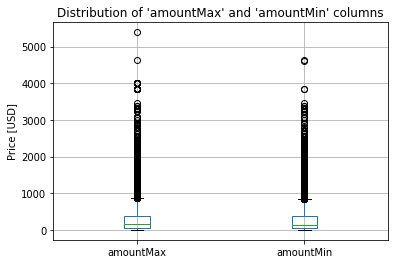

In [182]:
temp.boxplot()
plt.ylabel("Price [USD]")
plt.title("Distribution of 'amountMax' and 'amountMin' columns");

From the plot, it is evident that the data has many outliers which explain the huge standard deviations and the huge gap between the means and the medians.

Checking if in any row has equal values in these two columns:

In [152]:
df[df["amountMax"] == df["amountMin"]].shape[0]*100/df.shape[0]

90.81252586563664

It's clear that approximately 90% of the rows have same values in those two columns.

Let's move on to the availability column.

In [160]:
temp = df.availability.value_counts().to_frame()
temp.columns = ["count"]
temp

,count
In Stock,3172
Yes,2136
yes,893
TRUE,663
Out Of Stock,115
Special Order,109
More on the Way,91
undefined,40
sold,22
No,4


As we can guess, the values "Yes", "yes" and "TRUE" are same as "In Stock" and the values "sold", "no" and "FALSE" are same as "Out Of Stock". Let's make the changes:

In [163]:
#Replacing values in columns with appropriate values
df["availability"].replace({"yes" : "In Stock", 
                            "Yes" : "In Stock", 
                            "TRUE" : "In Stock", 
                            "sold" : "Out Of Stock",
                            "No" : "Out Of Stock",
                            "FALSE" : "Out Of Stock",
                            }, inplace = True)

In [164]:
df.availability.value_counts()

In Stock           6864
Out Of Stock        142
Special Order       109
More on the Way      91
undefined            40
Retired               1
32 available          1
7 available           1
Name: availability, dtype: int64

Looks better.

   Some products are out of stock. The **"id"**, **"name"** and **"manufacturer"** of these products are:
    

In [170]:
Out_Of_Stock = df[df.availability =="Out Of Stock"][["id", "name", "manufacturer"]]
Out_Of_Stock.head()

,id,name,manufacturer
120,AVpfLsb-ilAPnD_xWtDE,Kenwood KFC-1653MRW 6.5 2-way Marine Speakers ...,Kenwood
188,AVpgF1BOilAPnD_xnTsK,iHome Rechargeable Splash Proof Stereo Bluetoo...,iHome
203,AV1YFmcQglJLPUi8IGd1,Corsair CMSA8GX3M2A1066C7 Apple 8 GB Dual Chan...,NaN
282,AVpiLlubilAPnD_xBoTa,House of Marley Smile Jamaica In-Ear Earbuds,House Of Marley
393,AVpfC6mu1cnluZ0-cszY,Russound - Acclaim 5 Series 5-1/4 2-Way Indoor...,Russound
